Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

Polynomial functions and kernel functions are related concepts in machine learning, particularly in the context of transforming data to handle non-linearity. Here’s how they connect:

### Polynomial Functions

- **Polynomial Functions**: These are mathematical expressions involving powers of variables. For example, a polynomial function of degree \( d \) in one variable is \( p(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_d x^d \).

- **In Machine Learning**: Polynomial features are used to map input data into higher-dimensional space. For instance, if you have a feature \( x \), including polynomial features like \( x^2 \), \( x^3 \), etc., allows the model to capture more complex relationships. This approach is commonly used in polynomial regression.

### Kernel Functions

- **Kernel Functions**: These are functions used in kernel methods, such as Support Vector Machines (SVMs) and Kernel Ridge Regression, to implicitly map data into a higher-dimensional space without explicitly performing the transformation. The kernel function computes the dot product of the transformed data points in this higher-dimensional space.

- **Polynomial Kernel**: A common example of a kernel function is the polynomial kernel, which is defined as:
  \[
  K(x_i, x_j) = (x_i^T x_j + c)^d
  \]
  where \( c \) is a constant, and \( d \) is the polynomial degree. This kernel function implicitly maps the data into a higher-dimensional space where a linear decision boundary can be effective.

### Relationship

- **Transformation**: Polynomial features directly transform data into a higher-dimensional space by adding polynomial terms. In contrast, kernel functions achieve a similar effect indirectly by computing the dot product in the higher-dimensional space without explicitly performing the transformation.

- **Computational Efficiency**: Using polynomial kernels allows machine learning algorithms to work with high-dimensional spaces efficiently, as it avoids the computational cost of explicitly transforming data into these spaces.

- **Flexibility**: While polynomial features are straightforward and explicit, kernel functions provide more flexibility and can represent various types of non-linear transformations, including polynomial, radial basis functions, and others.

In summary, polynomial functions and polynomial kernels are related in that polynomial kernels are a way to perform polynomial transformations implicitly, allowing algorithms to operate effectively in higher-dimensional spaces.

Here's a Python program that demonstrates the use of polynomial features and polynomial kernels using a simple dataset. We'll use polynomial features to transform the data manually and compare it with the results from using a polynomial kernel in a Support Vector Machine (SVM) classifier.



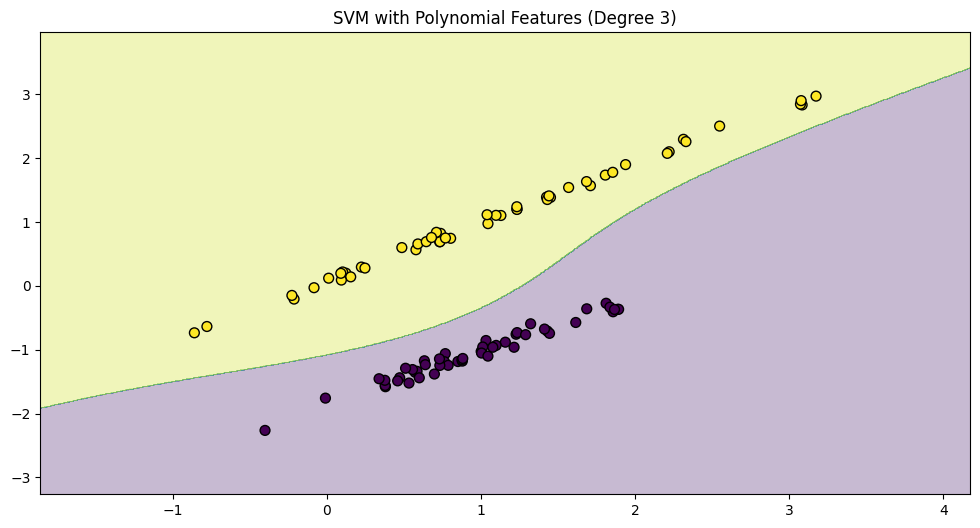

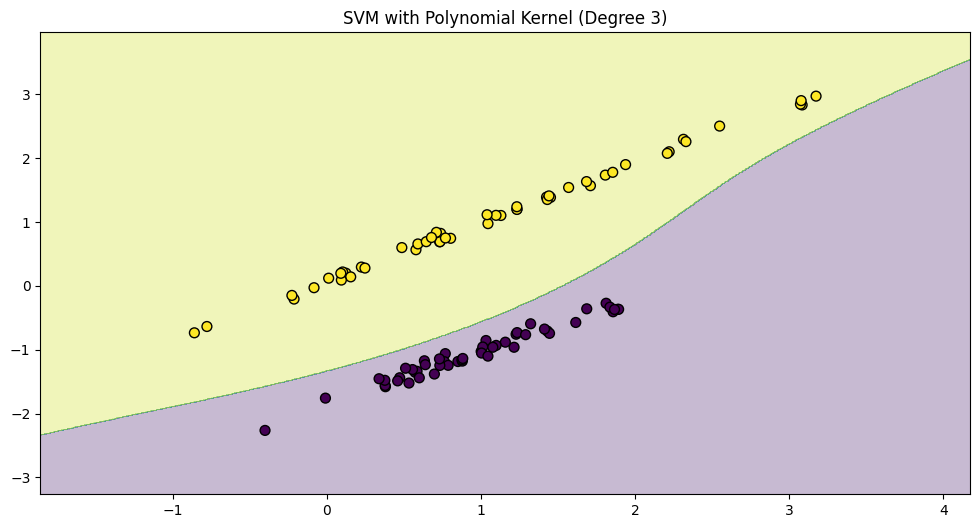

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

# Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Train a linear SVM on the polynomial features
svc_poly = SVC(kernel='linear')
svc_poly.fit(X_poly, y)

# Create an SVM with a polynomial kernel
svc_kernel = SVC(kernel='poly', degree=3)
svc_kernel.fit(X, y)

# Plot the results
def plot_decision_boundary(clf, X, y, title, plot_poly=False):
    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
    ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], 0.01),
                         np.arange(ylim[0], ylim[1], 0.01))
    if plot_poly:
        Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)

# Plot decision boundary for linear SVM on polynomial features
plot_decision_boundary(svc_poly, X, y, 'SVM with Polynomial Features (Degree 3)', plot_poly=True)

# Plot decision boundary for SVM with polynomial kernel
plot_decision_boundary(svc_kernel, X, y, 'SVM with Polynomial Kernel (Degree 3)')

plt.show()


Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Certainly! To implement an SVM with a polynomial kernel in Python using Scikit-learn, follow these steps:

1. **Load Data**:
   - Load your dataset (e.g., using NumPy or Pandas).
   - Split it into training and testing sets.

2. **Create an SVM Model**:
   - Import the necessary libraries:
     ```python
     from sklearn import svm
     from sklearn.datasets import load_iris
     ```
   - Load the Iris dataset (or any other dataset of your choice):
     ```python
     iris = load_iris()
     X = iris.data[:, :2]  # Extract the first two features
     y = iris.target
     ```
   - Create an SVM model with a polynomial kernel (e.g., degree 3):
     ```python
     model = svm.SVC(kernel='poly', degree=3)
     ```
   - Train the model on the training data:
     ```python
     model.fit(X, y)
     ```

3. **Make Predictions**:
   - Use the trained model to predict class labels for test data:
     ```python
     test_predictions = model.predict(X_test)
     ```

4. **Evaluate Performance**:
   - Calculate accuracy or other relevant metrics:
     ```python
     accuracy = model.score(X_test, y_test)
     print(f"Accuracy of SVM with polynomial kernel: {accuracy:.4f}")
     ```

5. **Hyperparameters**:
   - You can adjust the degree of the polynomial kernel by changing the `degree` parameter.
   - Experiment with different values to find the best fit for your data.

Remember to replace the Iris dataset with your own data and adjust hyperparameters as needed. Scikit-learn makes it easy to experiment with different kernels and settings!


Implementing an SVM with a polynomial kernel in Scikit-learn is straightforward. You can use the SVC class from Scikit-learn's svm module and specify the kernel parameter as 'poly' for a polynomial kernel. Here's a step-by-step guide with an example:



## Example: SVM with Polynomial Kernel


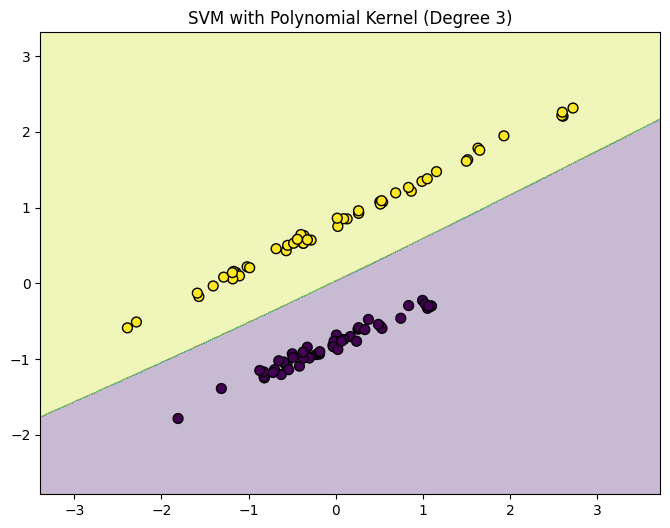

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an SVM with a polynomial kernel
degree = 3  # Degree of the polynomial kernel
svc_poly = SVC(kernel='poly', degree=degree, coef0=1, C=1.0)

# Train the model
svc_poly.fit(X, y)

# Plot the decision boundary
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
    ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], 0.01),
                         np.arange(ylim[0], ylim[1], 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)

# Plot decision boundary for the polynomial kernel SVM
plot_decision_boundary(svc_poly, X, y, f'SVM with Polynomial Kernel (Degree {degree})')

plt.show()


Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the parameter `epsilon` (ε) specifies a margin of tolerance where no penalty is given for errors. Increasing the value of `epsilon` affects the number of support vectors and the behavior of the SVR model as follows:

### Effect of Increasing `epsilon` on Support Vectors

1. **Increased Tolerance for Errors**:
   - A larger `epsilon` means that the model allows for a wider margin of tolerance around the predicted values. This tolerance means that errors within this margin do not contribute to the loss function or affect the model.

2. **Fewer Support Vectors**:
   - When `epsilon` is increased, the model becomes less sensitive to small deviations between the predicted and actual values within the `epsilon` margin. As a result, fewer data points are considered support vectors because more points fall within the `epsilon` margin and thus do not influence the model.
   - Fewer support vectors typically means a simpler model, as fewer data points are used to define the regression function.

3. **Model Simplicity**:
   - With a larger `epsilon`, the SVR model tends to be simpler and smoother because it ignores more data points. This can reduce the complexity of the model and potentially lead to underfitting if `epsilon` is set too large.

4. **Impact on Fit and Flexibility**:
   - Increasing `epsilon` may reduce the model's flexibility in fitting the training data, as it effectively ignores data points that would otherwise influence the model. This can be beneficial if the goal is to achieve a more generalized model with fewer support vectors, but it might also lead to poorer performance if the `epsilon` is too large and important patterns in the data are ignored.

### Summary

In summary, increasing the value of `epsilon` in SVR generally leads to a decrease in the number of support vectors because it allows for a larger margin of tolerance around the predicted values. This can simplify the model but may also reduce its ability to fit the training data accurately, potentially leading to underfitting if `epsilon` is set too high.

To demonstrate how the value of epsilon affects the number of support vectors in Support Vector Regression (SVR), we can use a simple example with a synthetic dataset. We'll vary the epsilon parameter and observe how the number of support vectors changes.



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


In [6]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)


In [7]:
# Define epsilon values to test

epsilon_values = [0.1, 0.5, 1.0, 2.0]


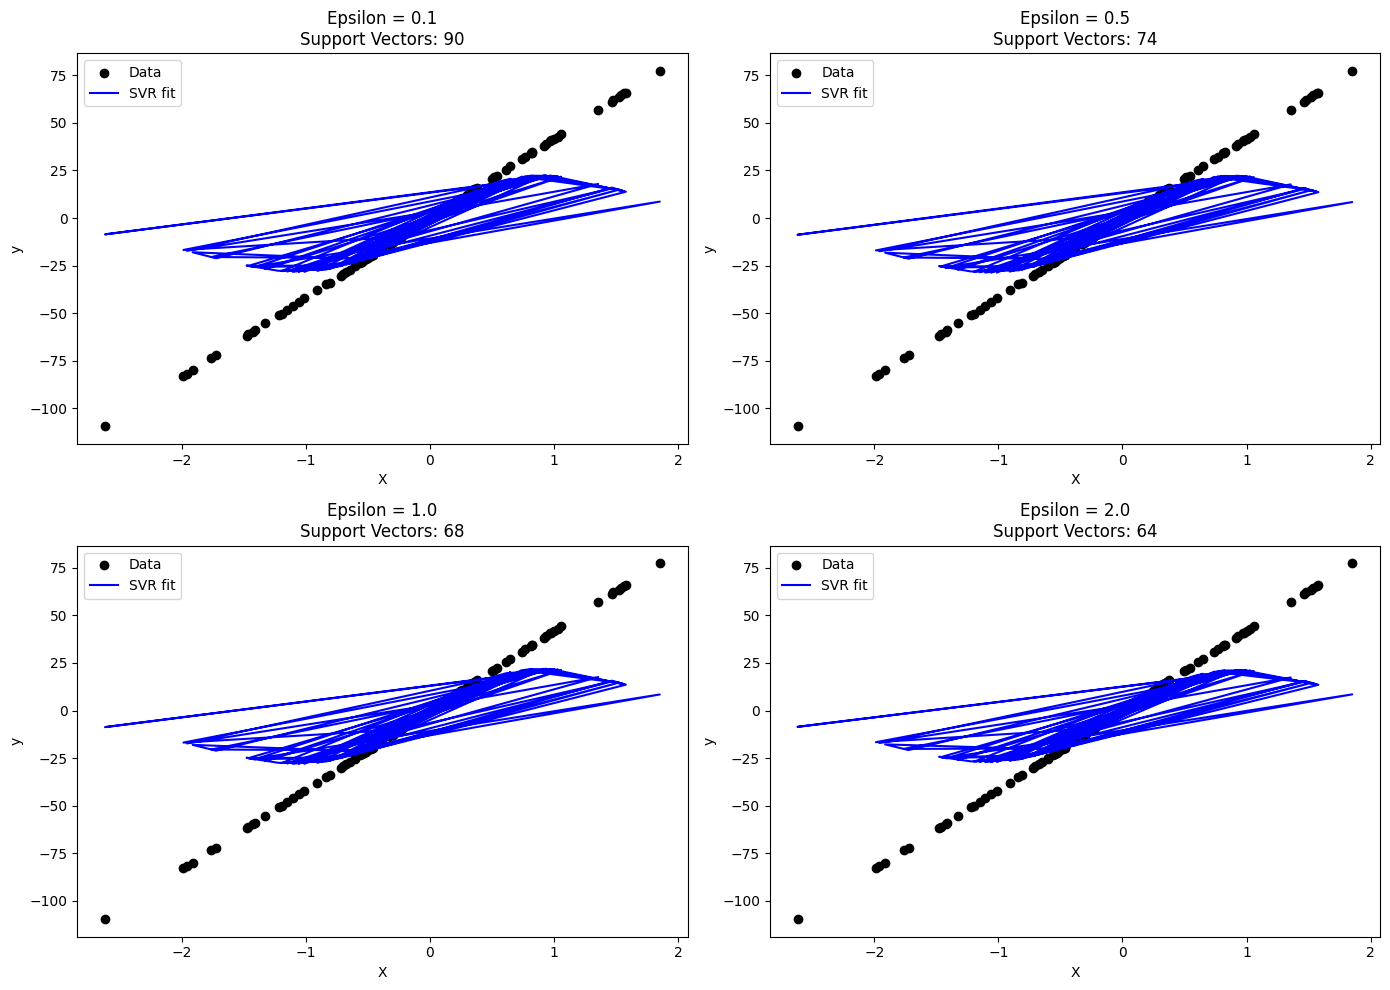

In [8]:
plt.figure(figsize=(14, 10))

for i, epsilon in enumerate(epsilon_values):
    # Create and train the SVR model
    svr = SVR(kernel='rbf', C=1.0, epsilon=epsilon)
    svr.fit(X, y)

    # Predict and calculate number of support vectors
    y_pred = svr.predict(X)
    num_support_vectors = len(svr.support_)

    # Plot results
    plt.subplot(2, 2, i + 1)
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X, y_pred, color='blue', label='SVR fit')
    plt.title(f'Epsilon = {epsilon}\nSupport Vectors: {num_support_vectors}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

In Support Vector Regression (SVR), several parameters influence the model's performance. Here's a detailed explanation of how each parameter works and how their values can affect the SVR model:

### 1. **Kernel Function**

- **Purpose**: The kernel function determines the type of transformation applied to the input data, allowing SVR to fit complex, non-linear relationships.

- **Types**:
  - **Linear Kernel**: \( K(x_i, x_j) = x_i^T x_j \)
    - **Use When**: The relationship between features and target is approximately linear. It is computationally efficient for linear problems.
  - **Polynomial Kernel**: \( K(x_i, x_j) = (x_i^T x_j + c)^d \)
    - **Use When**: The relationship is polynomial. Useful for problems where the data exhibits polynomial-like relationships.
  - **RBF (Radial Basis Function) Kernel**: \( K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) \)
    - **Use When**: The relationship is highly non-linear. RBF kernel can handle complex, non-linear relationships by mapping data into a higher-dimensional space.

- **Example**: If you have a dataset where the relationship between features and target is not linear (e.g., a sine wave), the RBF kernel might be more appropriate than the linear kernel.

### 2. **C Parameter**

- **Purpose**: The `C` parameter controls the trade-off between achieving a low training error and minimizing the model complexity.

- **Effect**:
  - **High C Value**: Results in a model that tries to fit the training data as closely as possible. This can lead to overfitting, where the model captures noise in the training data.
  - **Low C Value**: Results in a model that allows more errors in the training data to achieve a smoother decision boundary. This can lead to underfitting if `C` is too low.

- **Example**: If your data has some noise, a lower `C` might be preferred to avoid overfitting. If you need to capture complex patterns and can afford to tolerate some noise, a higher `C` could be better.

### 3. **Epsilon Parameter (ε)**

- **Purpose**: The `epsilon` parameter specifies a margin of tolerance within which no penalty is given for errors. It defines the width of the tube within which predictions are considered acceptable.

- **Effect**:
  - **Large Epsilon**: Allows for a wider margin of tolerance, resulting in fewer support vectors. This can lead to a smoother regression line and potentially underfitting if `epsilon` is too large.
  - **Small Epsilon**: Results in a tighter margin, potentially including more support vectors and capturing finer details of the training data. This can lead to overfitting if `epsilon` is too small.

- **Example**: If the target values have a lot of noise, increasing `epsilon` might help in creating a more robust model that is less sensitive to minor fluctuations.

### 4. **Gamma Parameter (γ)**

- **Purpose**: The `gamma` parameter defines the influence of a single training example. It determines how far the influence of a single training example reaches.

- **Effect**:
  - **High Gamma**: Leads to a model that is more sensitive to individual training points. This can make the model fit very closely to the training data, potentially leading to overfitting.
  - **Low Gamma**: Results in a smoother model with broader influence of training points. This can make the model more general and less likely to overfit.

- **Example**: For datasets where the data points are clustered closely, a high gamma value might be used to fit the model tightly. For datasets with more dispersed data, a lower gamma might help in capturing the overall trend without overfitting to specific points.

### Summary

- **Kernel Function**: Choose based on the nature of the relationship between features and target. Use linear for simple linear relationships, polynomial for polynomial relationships, and RBF for complex non-linear relationships.
- **C Parameter**: Adjust based on the trade-off between fitting the training data well (high `C`) and maintaining a simpler model (low `C`).
- **Epsilon Parameter**: Control the width of the margin where no penalty is given. Larger `epsilon` results in fewer support vectors and a smoother fit, while smaller `epsilon` allows for more precise fitting.
- **Gamma Parameter**: Determines the influence of individual data points. Higher gamma values result in a more complex model, while lower gamma values lead to a smoother model.

By tuning these parameters appropriately, you can balance the trade-offs between bias and variance, and achieve a model that performs well on both training and unseen data.

 Here's a Python program that demonstrates the effect of different values for each parameter (C, epsilon, gamma) and kernel type (linear, polynomial, RBF) in Support Vector Regression (SVR). We'll use a synthetic dataset and visualize how changes in these parameters affect the model's performance.



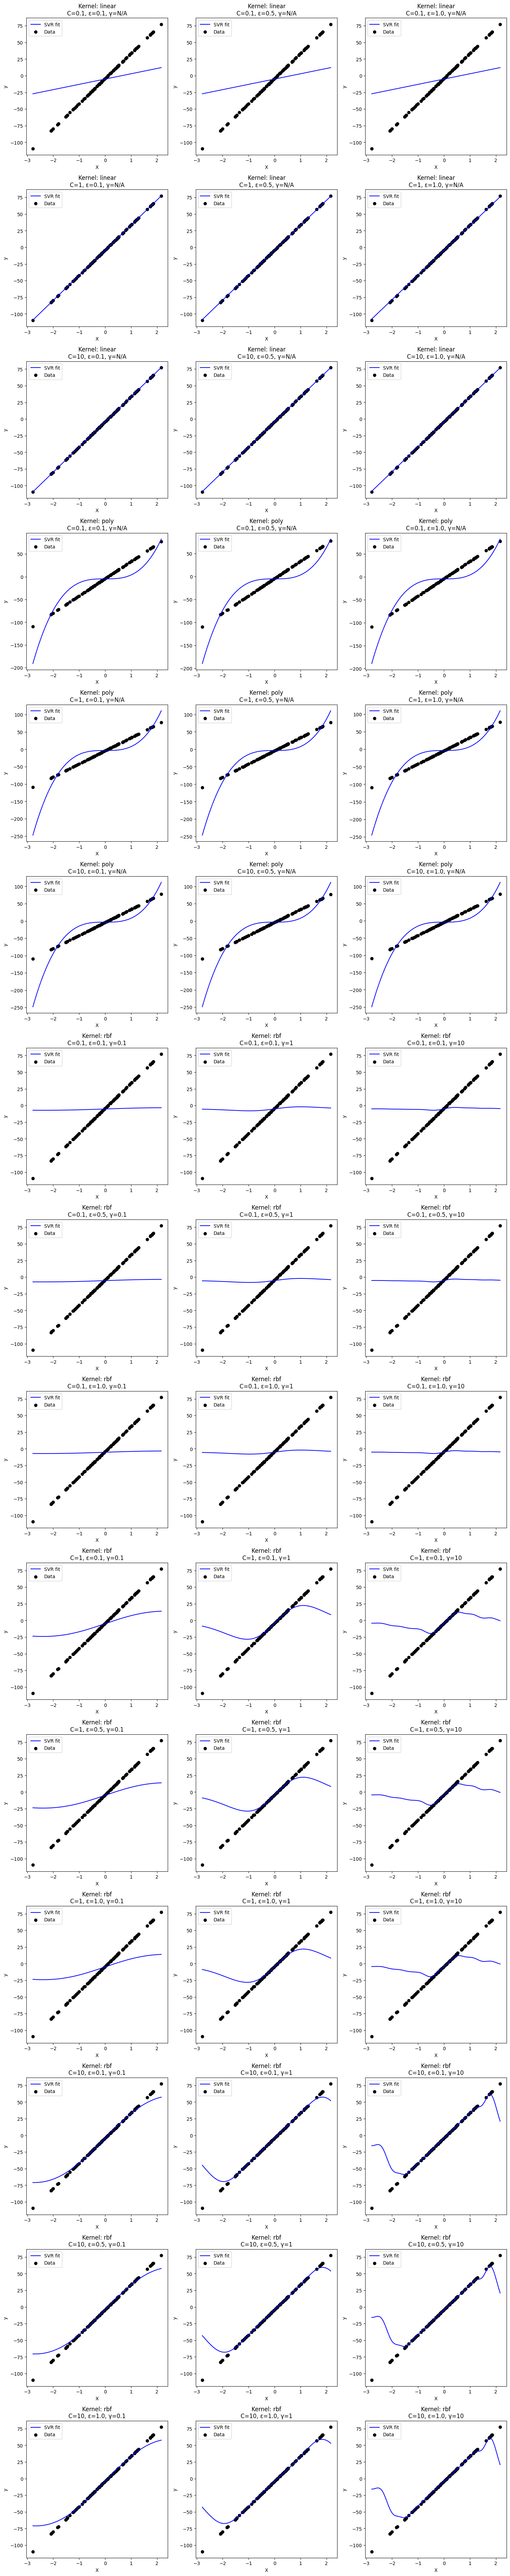

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define parameter values to test
parameters = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'epsilon': [0.1, 0.5, 1.0],  # Epsilon parameter
    'gamma': [0.1, 1, 10],       # Gamma parameter for RBF kernel
    'kernels': ['linear', 'poly', 'rbf']  # Kernel types
}

# Calculate the number of plots needed
num_plots = len(parameters['kernels']) * len(parameters['C']) * len(parameters['epsilon']) * len(parameters['gamma'])
num_rows = int(np.ceil(num_plots / 3))
num_cols = min(3, num_plots)

plt.figure(figsize=(5 * num_cols, 5 * num_rows))

def plot_svr(ax, model, X, y, title):
    # Predict and plot results
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_range)
    ax.plot(X_range, y_pred, color='blue', label='SVR fit')
    ax.scatter(X, y, color='black', label='Data')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()

# Test different values of C, epsilon, gamma, and kernel
plot_index = 0
for kernel in parameters['kernels']:
    for C in parameters['C']:
        for epsilon in parameters['epsilon']:
            # Define gamma values for RBF kernel only
            gamma_values = parameters['gamma'] if kernel == 'rbf' else [None]
            for gamma in gamma_values:
                # Create and train the SVR model
                svr_params = {'kernel': kernel, 'C': C, 'epsilon': epsilon}
                if kernel == 'rbf':
                    svr_params['gamma'] = gamma

                svr = SVR(**svr_params)
                svr.fit(X, y)

                # Plot results
                ax = plt.subplot(num_rows, num_cols, plot_index + 1)
                title = f"Kernel: {kernel}\nC={C}, ε={epsilon}, γ={gamma or 'N/A'}"
                plot_svr(ax, svr, X, y, title)
                plot_index += 1

plt.tight_layout()
plt.show()


Q5. Assignment:
*  Import the necessary libraries and load the dataseg

* Split the dataset into training and testing setZ
* Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
* Create an instance of the SVC classifier and train it on the training data hse the trained classifier to predict the labels of the testing datW
* Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-scoreK
* Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performanc_
* Train the tuned classifier on the entire dataseg
*  Save the trained classifier to a file for future use.

To address the assignment, here's a step-by-step Python script that demonstrates how to perform each task using the scikit-learn library. We'll use the famous Iris dataset for this example, but you can replace it with your own dataset if needed.



In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [12]:
# 1. Import the necessary libraries and load the dataset
# Load the Iris dataset
data = load_iris()


In [13]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
X = data.data


In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y = data.target


In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# 3. Preprocess the data using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# 4. Create an instance of the SVC classifier and train it on the training data
svc = SVC()
svc.fit(X_train_scaled, y_train)


SVC()

In [22]:
# 5. Use the trained classifier to predict the labels of the testing data
y_pred = svc.predict(X_test_scaled)


In [23]:
# 6. Evaluate the performance of the classifier
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
# 7. Tune the hyperparameters of the SVC classifier using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9523809523809523


In [26]:
# 8. Train the tuned classifier on the entire dataset
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset
best_svc.fit(X_scaled, y)  # Train on the scaled dataset


SVC(C=10, kernel='linear')

In [27]:
# 9. Save the trained classifier to a file for future use
joblib.dump(best_svc, 'best_svc_model.pkl')

['best_svc_model.pkl']

In [28]:
print("Model saved to 'best_svc_model.pkl'")

Model saved to 'best_svc_model.pkl'


For the assignment, let's use the Breast Cancer Wisconsin dataset, which is a common dataset for classification tasks. Here's a detailed Python script to complete each step:



In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1. Import the necessary libraries and load the dataset
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Preprocess the data using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Create an instance of the SVC classifier and train it on the training data
svc = SVC()
svc.fit(X_train_scaled, y_train)

# 5. Use the trained classifier to predict the labels of the testing data
y_pred = svc.predict(X_test_scaled)

# 6. Evaluate the performance of the classifier
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Tune the hyperparameters of the SVC classifier using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 8. Train the tuned classifier on the entire dataset
best_svc = grid_search.best_estimator_
best_svc.fit(X, y)  # X and y are the entire dataset

# 9. Save the trained classifier to a file for future use
joblib.dump(best_svc, 'best_svc_model.pkl')

print("Model saved to 'best_svc_model.pkl'")


Accuracy Score: 0.9766081871345029
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9748417721518987
Model saved to 'best_svc_model.pkl'
